REINFORCEMENT LEARNING DA1

METUL PRABHU

20BRS1101

FROZEN LAKE

In [1]:
import gym

env = gym.make("FrozenLake-v1", render_mode="human",is_slippery=True)
env.action_space.seed(42)
count=0
observation, info = env.reset(seed=42)
rewards=[]
observations=[]
print(env.action_space)
print(env.observation_space)
print(env.reward_range)
for _ in range(1000):
    observation, reward, terminated, truncated, info = env.step(env.action_space.sample())
    rewards.append(reward)
    observations.append(observation)
    if reward==1:
        observation, info = env.reset()
        print("\nThe state sequence:",observations)
        print("the rewards and total:",rewards,sum(rewards))
        print(count+1)
        break
    if terminated or truncated:
        observation, info = env.reset()
        print("\nThe state sequence:",observations)
        print("the rewards and total:",rewards,sum(rewards))
        count+=1
        rewards=[]
        observations=[]

env.close()

Discrete(4)
Discrete(16)
(0, 1)

The state sequence: [0, 0, 0, 0, 1, 0, 4, 8, 8, 8, 4, 0, 0, 0, 4, 0, 4, 8, 4, 5]
the rewards and total: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] 0.0

The state sequence: [0, 1, 5]
the rewards and total: [0.0, 0.0, 0.0] 0.0

The state sequence: [0, 1, 5]
the rewards and total: [0.0, 0.0, 0.0] 0.0

The state sequence: [1, 0, 4, 8, 12]
the rewards and total: [0.0, 0.0, 0.0, 0.0, 0.0] 0.0

The state sequence: [0, 0, 4, 4, 4, 4, 4, 4, 0, 4, 0, 4, 5]
the rewards and total: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] 0.0

The state sequence: [0, 1, 2, 2, 2, 1, 1, 0, 0, 0, 1, 0, 1, 5]
the rewards and total: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] 0.0

The state sequence: [1, 2, 3, 7]
the rewards and total: [0.0, 0.0, 0.0, 0.0] 0.0

The state sequence: [0, 0, 1, 0, 1, 0, 0, 4, 0, 4, 8, 8, 4, 4, 4, 0, 0, 1, 2, 6, 2, 1, 2, 3, 3, 7]
the rewards and total

FROZEN LAKE UPDATED REWARDS

In [2]:
class CustomFrozenLakeEnv(gym.Env):
    def __init__(self, env):
        self.env = env
        
    def step(self, action):
        state, reward, done, info,prob= self.env.step(action)
        # change the reward function here
        if state in [5,7,11,12]:
            reward =-10
        elif state==15:
            reward=10
        else:
            reward = -1 # for example
        #print(state, reward, done, info,prob)
        return state, reward, done, info,prob
    
    def reset(self):
        return self.env.reset()
    
    def render(self):
        return self.env.render()

custom_env = CustomFrozenLakeEnv(env)

In [ ]:
import numpy as np
done = False
state = custom_env.reset()
rewards=[]

count=0
for _ in range(1000):
    observation, reward, terminated, truncated, info = custom_env.step(env.action_space.sample())
    rewards.append(reward)
    observations.append(observation)
    if reward==10:
        observation, info = custom_env.reset()
        print("\nThe state sequence:",observations)
        print("the rewards and total:",rewards,sum(rewards))
        print(count+1)
        break
    if terminated or truncated:
        observation, info = custom_env.reset()
        print("\nThe state sequence:",observations)
        print("the rewards and total:",rewards,sum(rewards))
        count+=1
        rewards=[]
        observations=[]

env.close()

In [4]:
print(env.action_space)
print(env.observation_space)

Discrete(4)
Discrete(16)


VALUE ITERATION

In [6]:
import numpy as np

env = gym.make("FrozenLake-v1",render_mode="human")
discount_factor = 0.7
P = np.zeros((env.observation_space.n, env.action_space.n, env.observation_space.n))

for s in range(env.observation_space.n):
    for a in range(env.action_space.n):
        for transition in env.P[s][a]:
            prob, next_state, reward, done = transition
            P[s, a, next_state] = prob

R = np.zeros((env.observation_space.n, env.action_space.n, env.observation_space.n))
for s in range(env.observation_space.n):
    for a in range(env.action_space.n):
        for transition in env.P[s][a]:
            prob, next_state, reward, done = transition
            R[s, a, next_state] = reward

def value_iteration(P, R, discount_factor):
    V = np.zeros(env.observation_space.n)
    for i in range(100):
        Q = np.zeros((env.observation_space.n, env.action_space.n))
        for s in range(env.observation_space.n):
            for a in range(env.action_space.n):
                for next_s in range(env.observation_space.n):
                    Q[s, a] += P[s, a, next_s] * (R[s, a, next_s] + discount_factor * V[next_s])
                    
        V = np.max(Q, axis=1)
    return V

# Compute the optimal value function

V = value_iteration(P, R, discount_factor)
print(V)

[0.00449108 0.00515001 0.01243038 0.00378316 0.00960639 0.
 0.03569265 0.         0.02707277 0.07934699 0.14053814 0.
 0.         0.17244764 0.48726667 0.        ]


In [7]:
import numpy as np
import gym

env = gym.make("FrozenLake-v1",render_mode="human")

value_function = np.zeros(env.observation_space.n)
policy = np.zeros(env.observation_space.n)
discount_factor = 0.9

num_iterations = 1000
for i in range(num_iterations):
    new_value_function = np.copy(value_function)
    for state in range(env.observation_space.n):
        action_values =np.zeros(env.action_space.n)
        for action in range(env.action_space.n):
            for transition_prob, next_state, reward, done in env.P[state][action]:
                action_values[action] += transition_prob * (reward + discount_factor * new_value_function[next_state])
        best_action = np.argmax(action_values)
        policy[state] = int(best_action)
        policy=np.asarray(policy,dtype="int")
        new_value_function[state] = action_values[best_action]
    value_function = np.copy(new_value_function)

env.reset()
state=0
print(value_function)
done = False
while not done:
    action = policy[state]
    print(action)
    next_state, reward, done, _,a = env.step(action)
    env.render()
    state = next_state


[0.0688909  0.06141457 0.07440976 0.05580732 0.09185454 0.
 0.11220821 0.         0.14543635 0.24749695 0.29961759 0.
 0.         0.3799359  0.63902015 0.        ]
0
0
0
0
0
0
0
0
0
0
0
0
0
3
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
3
3
1
0
1
2
2
2
2
1
0
1
2
1
2
1
2
1
0
1


Text(0.5, 1.0, 'state value function of initial state vs discount factor')

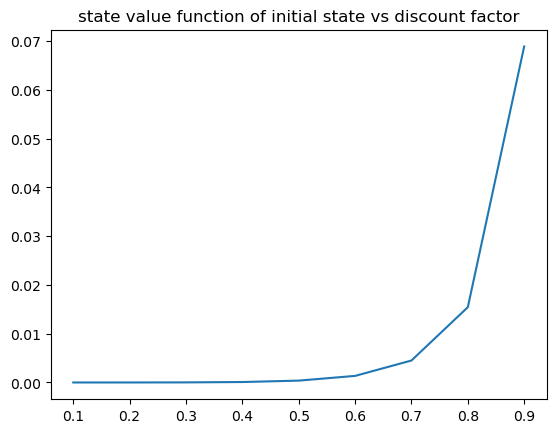

In [6]:
import numpy as np
import gym
import matplotlib.pyplot as plt


discount_factor = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
val0=[]
num_iterations = 1000
for d in discount_factor:
    env = gym.make("FrozenLake-v1",render_mode="human")
    value_function = np.zeros(env.observation_space.n)
    policy = np.zeros(env.observation_space.n)
    for i in range(num_iterations):
        new_value_function = np.copy(value_function)
        for state in range(env.observation_space.n):
            action_values =np.zeros(env.action_space.n)
            for action in range(env.action_space.n):
                for transition_prob, next_state, reward, done in env.P[state][action]:
                    action_values[action] += transition_prob * (reward + d * new_value_function[next_state])
            best_action = np.argmax(action_values)
            policy[state] = int(best_action)
            policy=np.asarray(policy,dtype="int")
            new_value_function[state] = action_values[best_action]
        value_function = np.copy(new_value_function)
    val0.append(value_function[0])
    env.reset()
plt.plot(discount_factor,val0)
plt.title("state value function of initial state vs discount factor")